## **Applying SVM algorithm on the loan dataset**

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.metrics import accuracy_score # used to evaluate the accuracy of a classification model
%matplotlib inline 

loan_dataset = pd.read_excel("loan.xlsx") #loading the data set
print(loan_dataset)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [21]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['Occupation', 'Sex', 'Res_status', 'Telephone', 'Job_status', 'Liab_ref', 'Acc_ref', 'Decision']

# Iterating over the columns to encode
for col in columns_to_encode:
    
    if col in loan_dataset.columns:
        # Using label encoder to fit and transform the column
        loan_dataset[col] = le.fit_transform(loan_dataset[col])
        

In [22]:
#removing unwanted data
loan_dataset_cols = loan_dataset.columns
def remove_outliers(column_names):
  Q1 = np.percentile(loan_dataset[column_names], 25)
  Q3 = np.percentile(loan_dataset[column_names], 75)
  IQR = Q3 - Q1
  upper = np.where(loan_dataset[column_names] >= (Q3+1.5*IQR))
  lower = np.where(loan_dataset[column_names] <= (Q1-1.5*IQR))
  try:
    loan_dataset.drop(upper[0], inplace = True)
    loan_dataset.drop(lower[0], inplace = True)
  except:
    return

for column_names in loan_dataset_cols:
  remove_outliers(column_names)

#spliting the data into Training and Testing
from sklearn.model_selection import train_test_split
y = loan_dataset["Decision"]
X = loan_dataset.drop(["Decision"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#applying SVM model Linear kernel
from sklearn.svm import SVC 
clf = SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
pred_linear = clf.predict(X_test)
accuracy_linear = accuracy_score(y_test, pred_linear) * 100
print("Accuracy score (linear kernel): {:.2f}%".format(accuracy_linear))

Accuracy score (linear kernel): 76.00%


In [24]:
#applying SVM model Polynomial Kernel
clf_poly = SVC(kernel="poly", C=100)
clf_poly.fit(X_train, y_train)
pred_poly = clf_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, pred_poly) * 100
print("Accuracy score (Polynomial Kernel): {:.2f}%".format(accuracy_poly))

Accuracy score (Polynomial Kernel): 57.33%


In [25]:
#applying SVM model RBF Kernel
clf_rbf = SVC(C=100)
clf_rbf.fit(X_train, y_train)
pred_rbf = clf_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, pred_rbf) * 100
print("Accuracy score (RBF Kernel): {:.2f}%".format(accuracy_rbf))

Accuracy score (RBF Kernel): 72.00%


In [26]:
#applying SVM model Sigmoid Kernel
clf_sigmoid = SVC(kernel="sigmoid", C=100)
clf_sigmoid.fit(X_train, y_train)
pred_sigmoid = clf_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test,pred_sigmoid)*100
print("Accuracy score (Sigmoid Kernel): {:.2f}%".format(accuracy_sigmoid))

Accuracy score (Sigmoid Kernel): 61.33%


### **Linear Kernel has the highest accuracy of 76.**

SVM (Linear Kernel)
Accuracy: 0.76
Confusion Matrix:
[[26  9]
 [ 9 31]]


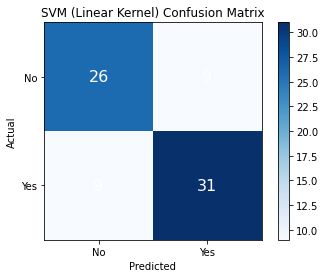

SVM (Polynomial Kernel)
Accuracy: 0.57
Confusion Matrix:
[[ 4 31]
 [ 1 39]]


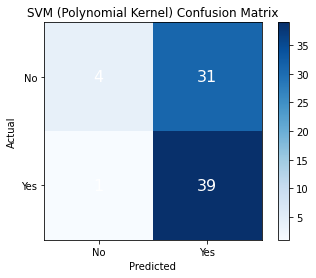

SVM (Radial Basis Function Kernel)
Accuracy: 0.72
Confusion Matrix:
[[21 14]
 [ 7 33]]


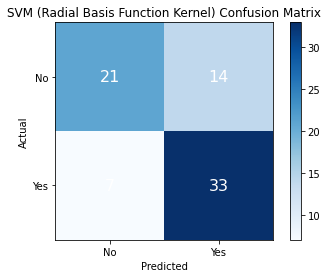

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the SVM classifiers with different kernels
classifiers = {
    "SVM (Linear Kernel)": SVC(kernel="linear", C=100),
    "SVM (Polynomial Kernel)": SVC(kernel="poly", C=100),
    "SVM (Radial Basis Function Kernel)": SVC(kernel="rbf", C=100)
}

# Train and evaluate each classifier, and print the accuracy and confusion matrix
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(name)
    print(f"Accuracy: {acc:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.colorbar()
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=16)
    plt.show()


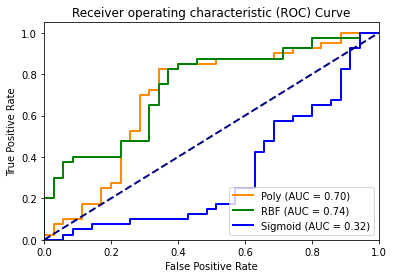

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf_poly = SVC(kernel="poly", C=100, probability=True)
clf_poly.fit(X_train, y_train)
clf_rbf = SVC(kernel="rbf", C=100, probability=True)
clf_rbf.fit(X_train, y_train)
clf_sigmoid = SVC(kernel="sigmoid", C=100, probability=True)
clf_sigmoid.fit(X_train, y_train)

# predict probabilities for each model
probas_poly = clf_poly.predict_proba(X_test)
probas_rbf = clf_rbf.predict_proba(X_test)
probas_sigmoid = clf_sigmoid.predict_proba(X_test)

# calculate ROC curve and AUC for each model
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, probas_poly[:, 1])
roc_auc_poly = auc(fpr_poly, tpr_poly)

fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, probas_rbf[:, 1])
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

fpr_sigmoid, tpr_sigmoid, thresholds_sigmoid = roc_curve(y_test, probas_sigmoid[:, 1])
roc_auc_sigmoid = auc(fpr_sigmoid, tpr_sigmoid)

# plot ROC curve for each model
plt.figure()
plt.plot(fpr_poly, tpr_poly, color='darkorange', lw=2, label='Poly (AUC = %0.2f)' % roc_auc_poly)
plt.plot(fpr_rbf, tpr_rbf, color='green', lw=2, label='RBF (AUC = %0.2f)' % roc_auc_rbf)
plt.plot(fpr_sigmoid, tpr_sigmoid, color='blue', lw=2, label='Sigmoid (AUC = %0.2f)' % roc_auc_sigmoid)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


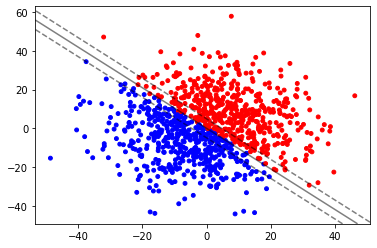

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# generate data
np.random.seed(42)
X = np.random.normal(scale=15, size=(1000, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# fit SVM model
clf = SVC(kernel="linear", C=0.001)
clf.fit(X, y)

# plot decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)
ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# show plot
plt.show()